# Seattle Real Estate Evaluation - EDA - Simon Klemm

## Table of Contents

1. [**Introduction**](#1)
    - Project Description
    - Data Description
2. [**Acquiring and Loading Data**](#2)
	- Importing Libraries and Notebook Setup
    - Loading Data
    - Basic Data Exploration
    - Areas to Fix
3. [**Data Proprocessing**](#3)
4. [**Data Analysis**](#4)
5. [**Conclusion**](#5)
    - Insights
    - Suggestions
    - Possible Next Steps
6. [**Epilogue**](#6) 
    - References
    - Versioning

---

# 1

## Introduction

### Project Description

<p>&nbsp;</p>

**Goal/Purpose:** 


This project is about real estate data from King County, Washington, USA. The goal is to use EDA to work out three insights about the real estate market in King County and to give three recommendations for a potential buyer.

<p>&nbsp;</p>

**Stakeholder**

William Rodriguez, Buyer - 2 people, country (best timing & non-renovated) & city house (fast & central location), wants two houses  


<p>&nbsp;</p>


**Questions to be Answered:**

- Can it be determined that the given data will tell you if the zip code is urban or rural?
- Can it be determined if the house is in a central and fast location?
- Can we see if the house was renovated?
- What zip codes are best for William to consider when buying a property?
- What is the best time for William to buy a house in the country?

<p>&nbsp;</p>

**Assumptions/Methodology/Scope:** 

- The denser the population the more urban the area and vice-versa.
- There is an ideal time to buy a house on the countryside.
- 

<p>&nbsp;</p>

### Data Description

**Content:** 

This dataset is a _(filetype) file of _(how many) data points which contains ___. 

<p>&nbsp;</p>

**Description of Attributes:** 

Here you can describe what each column represents.

| Column  | Description |
| :------ | :---------- |
| column1 | description1 |

<p>&nbsp;</p>

**Acknowledgements:** 

This dataset is provided by _(. The original dataset was scraped by _) and the original source can be found on [website](https://website.link).

---

# 2

## Acquiring and Loading Data
### Importing Libraries and Notebook Setup

In [16]:
# Import pandas and sqlalchemy engine
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

# Import dotenv
import os
from dotenv import load_dotenv

### Loading Data

In [10]:
# load dotenv variables
load_dotenv()

DB_STRING = os.getenv('DB_STRING')

# create engine
db = create_engine(DB_STRING)

# load data with sql query into DataFrame
query_str = "SELECT * FROM eda.king_county_house_details d LEFT JOIN eda.king_county_house_sales s on s.house_id = d.id;" # mind the semicolon!!
df = pd.read_sql(query_str, db)
df.head()
df.to_csv('data/real_estate_data.csv')

We imported the data from our database via sqlalchemy and with the sql query we came up with all together in the lesson. We agreed that we would left join the sales data to the house details data.

### Basic Data Exploration

In [6]:
# # Show rows and columns count
print(f"Rows count: {df.shape[0]}\nColumns count: {df.shape[1]}")

# Rows count: 21597
# Columns count: 22

Rows count: 21597
Columns count: 22


In [11]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id
0,1,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,7129300520
1,2,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192
2,3,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,5631500400
3,4,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875
4,5,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,1954400510


In [8]:
df.tail()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id
21592,21593,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0,263000018
21593,21594,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0,6600060120
21594,21595,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0,1523300141
21595,21596,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,...,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0,291310100
21596,21597,2.0,0.75,1020.0,1076.0,2.0,0.0,0.0,3,7,...,2008,0.0,98144,47.5941,-122.299,1020.0,1357.0,2014-10-15,325000.0,1523300157


In [21]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id'],
      dtype='object')

The dataset includes around 21k rows and 22 columns. The column names are formatted in a python friendly way (underscores and lower case).

#### Check Data Types

In [14]:
# # Show data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

- Most columns are either **floats** or **ints**.
- `date` is a **string**. `date` should be a **datetime** type instead.

#### Check Missing Data

In [24]:
# import missingno
import missingno as msno
import matplotlib.pyplot as plt

In [28]:
# check for missing values in columns
df.isna().sum().sort_values()

id                  0
date                0
sqft_lot15          0
sqft_living15       0
long                0
lat                 0
zipcode             0
yr_built            0
price               0
sqft_above          0
condition           0
floors              0
sqft_lot            0
sqft_living         0
bathrooms           0
bedrooms            0
grade               0
house_id            0
view               63
sqft_basement     452
waterfront       2391
yr_renovated     3848
dtype: int64

<Axes: >

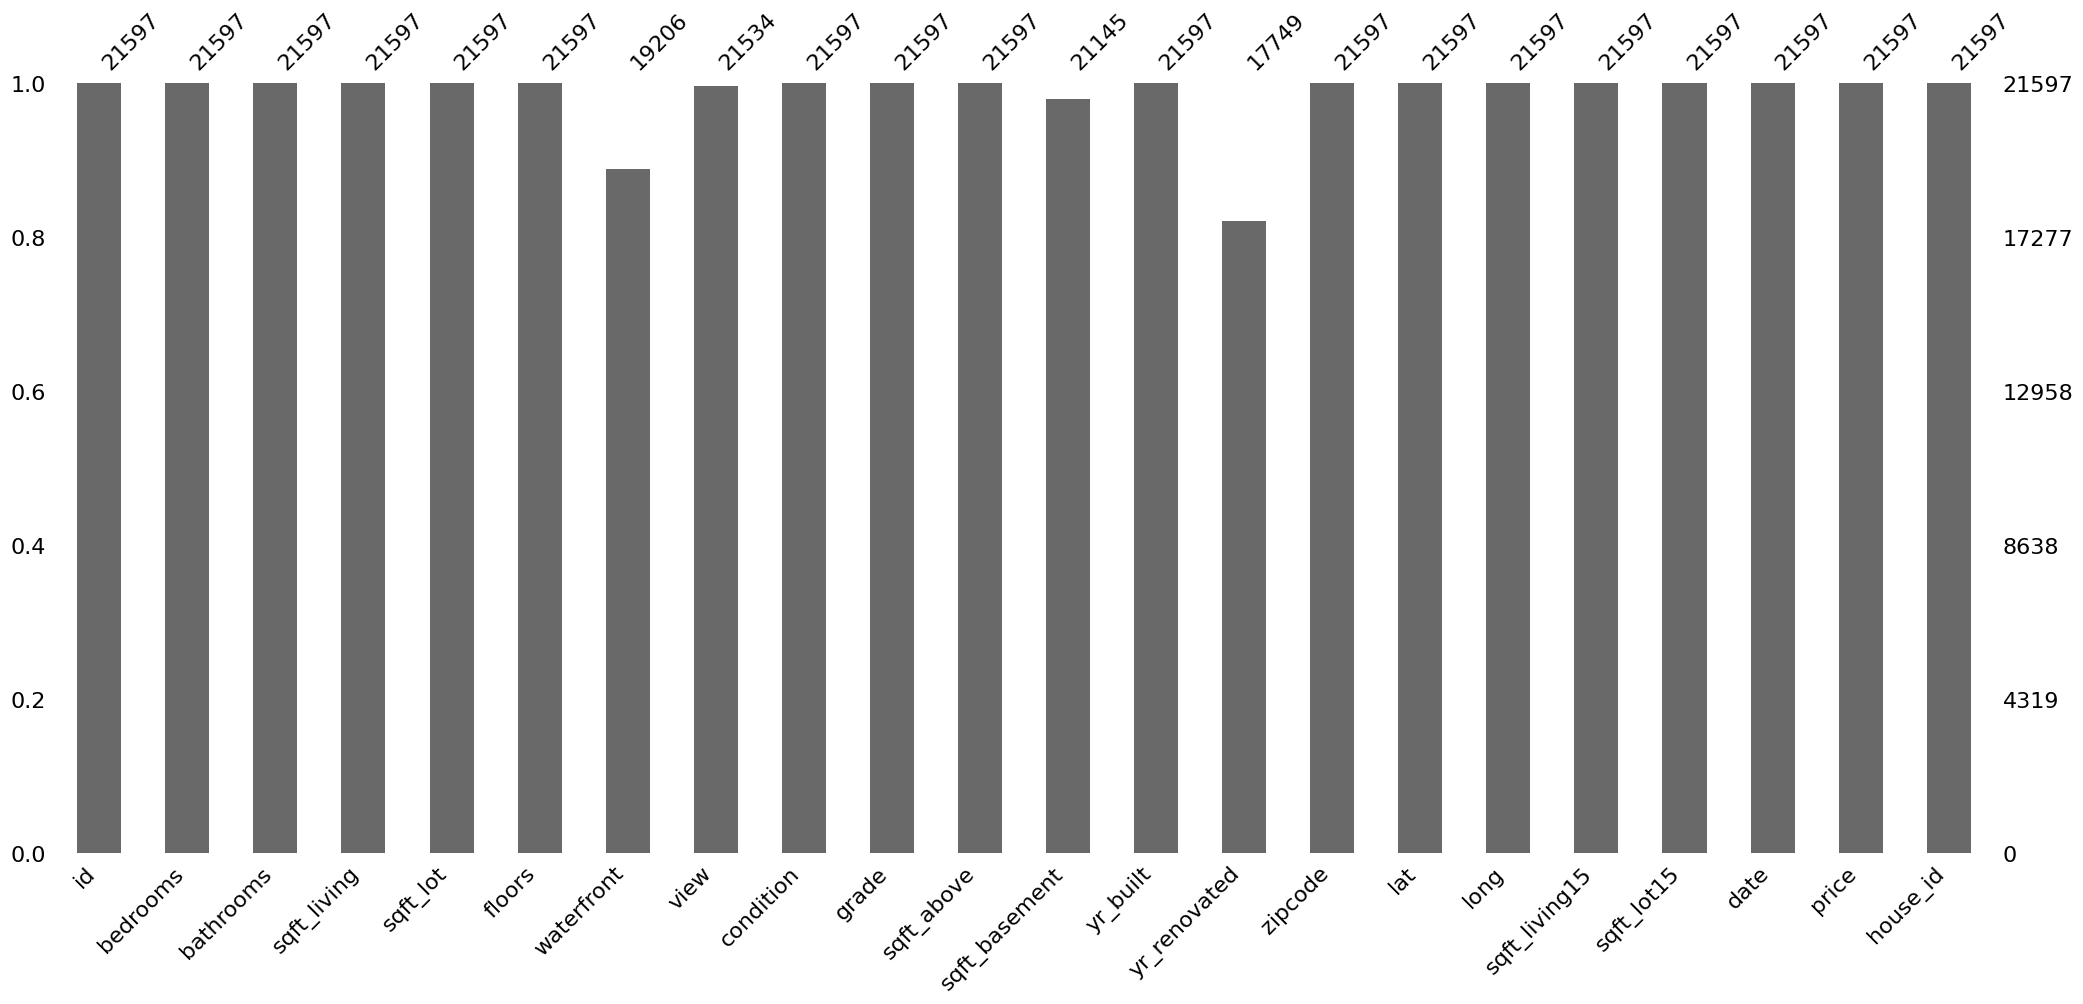

In [27]:
# plotting percentage of missing values per column
msno.bar(df)

<Axes: >

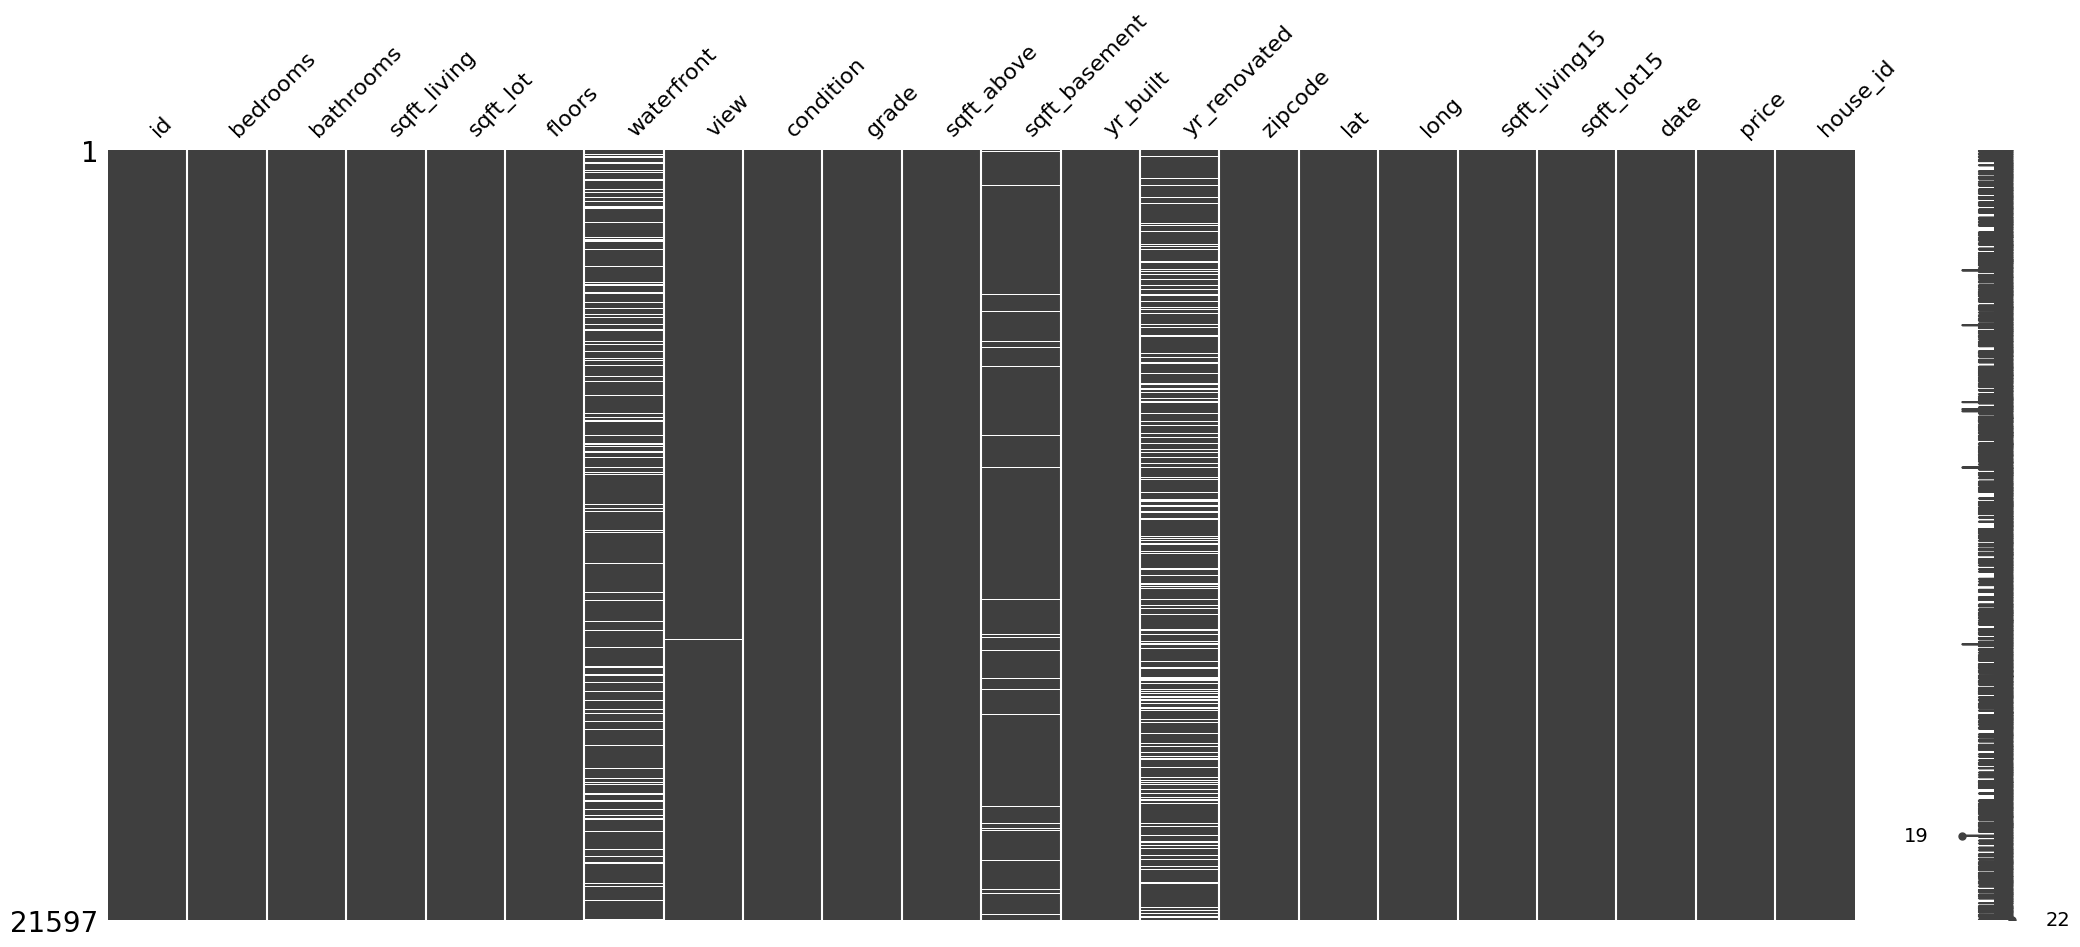

In [29]:
# check the missingno matrix for locations of missing data
msno.matrix(df)

The following columns are missing values:<br>
view               63<br>
sqft_basement     452<br>
waterfront       2391<br>
yr_renovated     3848<br>
After looking at the locations, there do not seem to be any patterns for the missing data at first glance.

#### Check for Duplicate Rows

In [31]:
# check how many duplicated rows exist in the data frame
df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

There are no duplicate rows.

#### Check Uniqueness of Data

In [33]:
# # Print the percentage similarity of values (the lower %, the better)
num_unique = df.nunique().sort_values()
print('---- Percentage Similarity of Values (%) -----')
print(100/num_unique)

---- Percentage Similarity of Values (%) -----
waterfront       50.000000
view             20.000000
condition        20.000000
floors           16.666667
grade             9.090909
bedrooms          8.333333
bathrooms         3.448276
zipcode           1.428571
yr_renovated      1.428571
yr_built          0.862069
sqft_basement     0.330033
date              0.268817
long              0.132979
sqft_living15     0.128700
sqft_above        0.106157
sqft_living       0.096712
price             0.027609
lat               0.019869
sqft_lot15        0.011518
sqft_lot          0.010229
house_id          0.004669
id                0.004630
dtype: float64


There are a number of categorical variables where values are quite similar (e.g. waterfront only `true` or `false`). Those can remain similar. The continous variables like sqft are dissimilar enough.

#### Check Data Range

In [42]:
# # Print summary statistics
df.describe(include='all').transpose()
#skim(df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,21597.0,NaN,NaN,NaN,10799.0,6234.661218,1.0,5400.0,10799.0,16198.0,21597.0
bedrooms,21597.0,NaN,NaN,NaN,3.3732,0.926299,1.0,3.0,3.0,4.0,33.0
bathrooms,21597.0,NaN,NaN,NaN,2.115826,0.768984,0.5,1.75,2.25,2.5,8.0
sqft_living,21597.0,NaN,NaN,NaN,2080.32185,918.106125,370.0,1430.0,1910.0,2550.0,13540.0
sqft_lot,21597.0,NaN,NaN,NaN,15099.40876,41412.636876,520.0,5040.0,7618.0,10685.0,1651359.0
floors,21597.0,NaN,NaN,NaN,1.494096,0.539683,1.0,1.0,1.5,2.0,3.5
waterfront,19206.0,NaN,NaN,NaN,0.007602,0.086858,0.0,0.0,0.0,0.0,1.0
view,21534.0,NaN,NaN,NaN,0.233863,0.765686,0.0,0.0,0.0,0.0,4.0
condition,21597.0,NaN,NaN,NaN,3.409825,0.650546,1.0,3.0,3.0,4.0,5.0
grade,21597.0,NaN,NaN,NaN,7.657915,1.1732,3.0,7.0,7.0,8.0,13.0


**Range and type of variables**

|  | min | max | type | range |
|---|---|---|---|---|
| bedrooms | 1 | 33 | categorical | 32 |
| bathrooms | 0.5 | 8 | categorical | 7.5 |
| floors | 1 | 3.5 | categorical | 2.5 |
| waterfront | 0 | 1 | categorical | 1 |
| view | 0 | 4 | categorical | 4 |
| condition | 1 | 5 | categorical | 4 |
| grade | 3 | 13 | categorical | 10 |
| yr_built | 1900 | 2015 | categorical | 115 |
| yr_renovated | 0 | 20150 | categorical | 20150 |
| zipcode | 98001 | 98199 | categorical | 198 |
| sqft_above | 370 | 9410 | numerical | 9040 |
| sqft_basement | 0 | 4820 | numerical | 4820 |
| sqft_living | 370 | 13540 | numerical | 13170 |
| sqft_lot | 520 | 1651359 | numerical | 1650839 |
| price | 78000 | 7700000 | numerical | 7622000 |
| lat | 47.1559 | 47.7776 | numerical | 0.6217 |
| long | -122.519 | -121.315 | numerical | 1.204 |
| sqft_living15 | 399 | 6210 | numerical | 5811 |
| sqft_lot15 | 651 | 871200 | numerical | 870549 |

### Areas to Fix
**Data Types**
- [ ] Change `date` column from string to panda datetime format.

**Missing Data**
- [ ] Fix columns that are missing data. At closer look, not all columns can be handled equally.

**Duplicate Rows**
- [x] No duplicate rows.

**Uniqueness of Data**
- [ ] No need to intervene

**Data Range**
- [ ] For now nothing looks suspicious.

---

# 3

## Data Preprocessing

Here you can add sections like:

- Renaming columns
- Drop Redundant Columns
- Changing Data Types
- Dropping Duplicates
- Handling Missing Values
- Handling Unreasonable Data Ranges
- Feature Engineering / Transformation

Use `assert` where possible to show that preprocessing is done.

### Drop Redundant Columns

In [44]:
# # Check the proportion of the most frequent value in each column
print('---- Frequency of the Mode (%) -----')
mode_dict = {col: (df[col].value_counts().iat[0] / df[col].size * 100) for col in df.columns}
mode_series = pd.Series(mode_dict)
mode_series

---- Frequency of the Mode (%) -----


id                0.004630
bedrooms         45.487799
bathrooms        24.896976
sqft_living       0.638978
sqft_lot          1.657638
floors           49.418901
waterfront       88.252998
view             89.929157
condition        64.916424
grade            41.552067
sqft_above        0.981618
sqft_basement    59.392508
yr_built          2.588322
yr_renovated     78.737788
zipcode           2.787424
lat               0.078715
long              0.532481
sqft_living15     0.912164
sqft_lot15        1.977126
date              0.657499
price             0.796407
house_id          0.013891
dtype: float64

In [16]:
# # Show the value frequency of each column greater than the mode's threshold
# threshold = 80
# for col in mode_series[mode_series > threshold].index:
#     print(df[col].value_counts(dropna=False))
#     print()

In [17]:
# # Drop columns (specify columns to drop)
# cols_to_drop = []
# df.drop(columns=cols_to_drop, axis=1, inplace=True)

In [18]:
# # Verify columns dropped
# assert all(col not in df.columns for col in cols_to_drop)

In [19]:
# # Drop columns (specify column indices to drop)
# df.drop(df.columns[a:b], axis=1, inplace=True)

In [20]:
# # Verify columns dropped
# assert all(col not in df.columns for col in df.columns[a:b])

In [21]:
# # Drop columns (specify columns to keep)
# cols_to_keep = []
# df = df[cols_to_keep]

In [22]:
# # Verify columns dropped
# assert all(col in df.columns for col in cols_to_keep)

### Changing Data Types

In [23]:
# # Convert columns to the right data types
# df[col] = df[col].astype('string')
# df[col] = df[col].astype('int')
# df[col] = pd.to_datetime(df[col], infer_datetime_format=True)

# # Convert to categorical datatype
# col_cat = ptypes.CategoricalDtype(categories=['A', 'B', 'C'], ordered=True)
# df['col_cat'] = df['col_cat'].astype(col_cat)

In [24]:
# # Verify conversion
# assert ptypes.is_string_dtype(df[col])
# assert ptypes.is_numeric_dtype(df[col])
# cols_to_check = []
# assert all(ptypes.is_datetime64_any_dtype(df[col]) for col in cols_to_check)

### Dropping Duplicates

In [25]:
# # Drop entirely duplicated rows
# df.drop_duplicates(inplace=True, ignore_index=True)

In [26]:
# # Verify rows dropped
# assert df.duplicated().sum()==0

### Handling Missing Values

### Handling Unreasonable Data Ranges

In [27]:
# # Drop affected rows
# df = df.loc[~((df['A'] == 0) | (df['B'] > 100))].reset_index()

In [28]:
# # Verify rows dropped
# len(df)

### Feature Engineering / Transformation

In [29]:
# # Get unique values of interested columns
# cols = []
# pd.unique(df[cols].values.ravel('k'))  # argument 'k' lists the values in the order of the cols 

In [30]:
# # Create custom function
# # Google style docstrings
# # https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html
# def custom_function(param1: int, param2: str) -> bool:
#     """Example function with PEP 484 type annotations.

#     Args:
#         param1: The first parameter.
#         param2: The second parameter.

#     Returns:
#         The return value. True for success, False otherwise.

#     """

In [31]:
# # Apply function to multiple columns
# cols = []
# df_updated = df.copy()
# df_updated[cols] = df_updated[cols].applymap(custom_function)

# # Create new aggregated boolean column
# df_updated['bool'] = df_updated[cols].any(axis=1, skipna=False)

---

# 4

## Data Analysis

Here is where your analysis begins. You can add different sections based on your project goals.

### Exploring `Column Name`

In [32]:
# Code and visualization

**Observations**
- Ob 1
- Ob 2
- Ob 3

---

# 5

## Conclusion

### Insights 
State the insights/outcomes of your project or notebook.

### Suggestions

Make suggestions based on insights.

### Possible Next Steps
Areas to expand on:
- (if there is any)

---

# 6

## Epilogue

### References

This is how we use inline citation[<sup id="fn1-back">[1]</sup>](#fn1).

[<span id="fn1">1.</span>](#fn1-back) _Author (date)._ Title. Available at: https://website.com (Accessed: Date). 

> Use [https://www.citethisforme.com/](https://www.citethisforme.com/) to create citations.

### Versioning
Notebook and insights by (author).
- Version: 1.5.0
- Date: 2023-05-15

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b689e16b-e36c-4f8c-b17a-b3e876352669' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>